In [1]:
#sudo apt install tesseract-ocr tesseract-ocr-kor

In [2]:
!pip install -q torch pytesseract opencv-python pillow matplotlib transformers

In [3]:
import os
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

def extract_text(image_path):
    """
    이미지를 그대로 사용하여 OCR 수행
    """
    img = cv2.imread(image_path)  # 컬러 그대로 읽음
    # OpenCV에서 BGR -> RGB 변환 (Pillow와 호환되게)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)

    # Notebook에 표시
    plt.imshow(img_rgb)
    plt.title('Loaded Image')
    plt.axis('off')
    plt.show()
    
    # OCR 수행
    # custom_config_formula = r'--oem 3 --psm 11 -c tessedit_char_whitelist=0123456789+-=<>(){}×÷—°⁎%∠∕≥≦≤≧⊥'
    # formula = pytesseract.image_to_string(pil_img, lang='kor+eng', config=custom_config_formula)
    custom_config_text = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(pil_img, lang='kor+eng', config=custom_config_text)
    return text

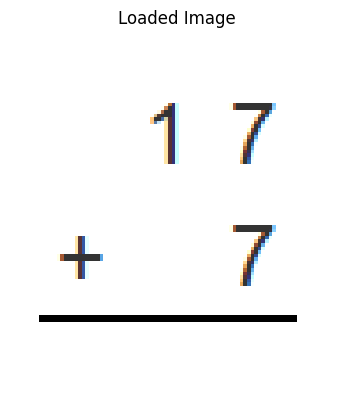

file: ./Exercises/초2_덧셈.png,
 17
+ 7



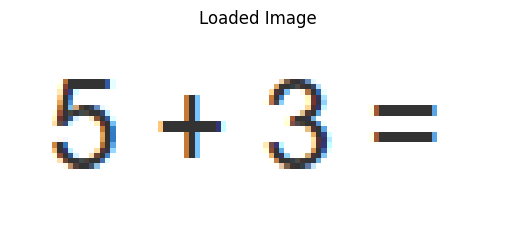

file: ./Exercises/초1_덧셈.png,
 5+3=



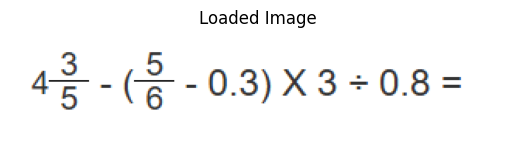

file: ./Exercises/초6_혼합계산.png,
 3   5        .   =
43 -(@ -0.3)X3+08=



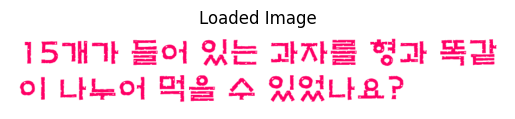

file: ./Exercises/초3_나눗셈.png,
 15개가 들어 있는 과자를 형과 똑같
이 나누어 먹을 수 있었나요?



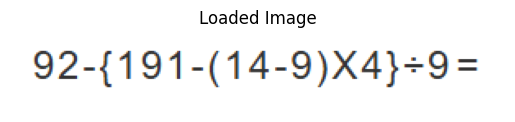

file: ./Exercises/초5_혼합계산.png,
 92-{191-(14-9)X4}+9=



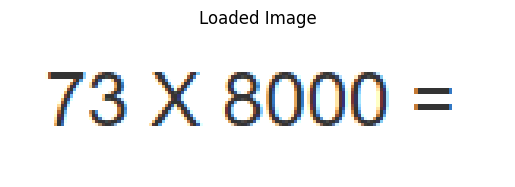

file: ./Exercises/초4_곱셈.png,
 73×8000=



In [4]:
# 예시
exercises_dir = "./Exercises"
extracted_texts = []
for image_path in os.listdir(exercises_dir):
    if not image_path.endswith(('.jpg', '.png')):
        continue
    
    path = os.path.join(exercises_dir, image_path)
    text = extract_text(path)
    extracted_texts.append(text)
    print(f"file: {path},\n {text}")
    print("=" * 25)

### Microsoft/Phi-4-mini-instruct

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# model 로드
model_name = "microsoft/Phi-4-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/home/jungi.byun/AMA/solution/jupyter_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-03 15:49:54.327166: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-03 15:49:54.355035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751525394.390999  487513 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751525394.402066  487513 cuda_bl

In [6]:
import torch

def generate_explanation(exercise, max_new_tokens=500, temperature=0.1):
    prompt = (
        f"문제:\n{exercise}\n\n"
        "당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.\n"
        "최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.\n"
        "초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.\n"
    )

    # 입력 토큰 변환
    inputs = tokenizer(
        prompt,
        return_tensors="pt"
    )
    # GPU 사용 시
    inputs = {k: v.cuda() for k, v in inputs.items()}
    model.cuda()

    # 텍스트 생성
    output = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        temperature=temperature,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )

    # 디코딩
    decoded = tokenizer.decode(output[0], skip_special_tokens=True)
    return decoded

In [7]:
from IPython.display import display, Markdown

answers = []
for text in extracted_texts:
    answer = generate_explanation(text)
    answers.append(answer)
    display(Markdown(answer))
    print("=" * 25)

문제:
17
+ 7


당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
단계 1: 문제를 이해하세요
17과 7을 더해야 합니다. 이것은 숫자를 더하는 것과 같습니다.

단계 2: 숫자를 정렬하세요
숫자를 정렬하는 것은 더하기에 도움이 되지 않습니다. 그래서 이 경우, 숫자를 그대로 유지합니다: 17 + 7.

단계 3: 수를 더하세요
17과 7을 더하기 위해, 7을 10에서 빼고 17 + 10으로 변환합니다. 이렇게 하면 더하기가 쉬워집니다: 17 + 10 + 7.

17과 10을 더하면 27이 됩니다. 이제 27과 7을 더합니다.

단계 4: 최종 답을 제시하세요
17과 7의 합은 24입니다.

정답: 24.

문제:
5+3=


당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
단계 1: 문제에서 주어진 수를 식별합니다: 5와 3입니다.
단계 2: 두 숫자를 더합니다: 5 + 3.
단계 3: 결과를 계산합니다: 5 + 3 = 8.
정답: 5 + 3 = 8입니다.

문제:
3   5        .   =
43 -(@ -0.3)X3+08=


당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
문제: 3 * 5 + . * 8 = 43 - (@ - 0.3 * X3 + 08)

1단계: 방정식의 양쪽을 간단히 합니다.
양쪽은 3 * 5 + . * 8 = 43 - (@ - 0.3 * X3 + 08)입니다.

2단계: 곱셈을 수행합니다.
양쪽의 첫 번째 항은 3 * 5 = 15입니다.
양쪽의 두 번째 항은 . * 8 = 8입니다 (여기서 .는 8을 나타내는 것으로 가정합니다).

3단계: 15 + 8을 계산합니다.
15 + 8 = 23.

4단계: 방정식의 왼쪽을 간단히 합니다.
양쪽의 왼쪽은 23입니다.

5단계: 방정식의 오른쪽을 간단히 합니다.
양쪽의 오른쪽은 43 - (@ - 0.3 * X3 + 08)입니다.
여기서 (@, X3, 08)는 변수나 오타일 것 같습니다. 이들은 정확한 값을 제공하지 않으므로 간단히 할 수 없습니다.

6단계: 간단히 할 수 없는 방정식을 식별합니다.
양쪽은 23 = 43 - (@ - 0.3 * X3 + 08)입니다.

정답: 간단히 할 수 없는 방정식 23 = 43 - (@ - 0.3 * X3 + 08)입니다.

문제:
15개가 들어 있는 과자를 형과 똑같
이 나누어 먹을 수 있었나요?


당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
단계 1: 문제 이해하기
15개의 과자가 두 개의 그룹에 나누어 먹을 수 있는지 알아봅시다. 각 그룹이 같은 수의 과자를 가져야 합니다.

단계 2: 나누기 확인하기
15을 2로 나누어 봅시다. 15은 2로 나누어지지 않습니다. 왜냐하면 15은 2로 나누어 떨어지지 않는 숫자입니다.

단계 3: 정답 제시하기
따라서 15개의 과자를 두 개의 그룹에 나누어 먹을 수 없습니다. 정답은 15을 2로 나누어지지 않습니다.

문제:
92-{191-(14-9)X4}+9=


당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
단계별로 해답을 찾는 과정을 단계별로 설명해 주세요.

[텍스트 기반 해답 과정]:

1단계: 방정식의 왼쪽 부분을 확인합니다: 92-{191-(14-9)X4}+9.

2단계: 방정식의 내부에서 가장 먼저 계산해야 합니다: (14-9).

3단계: 14에서 9를 빼서 5를 얻습니다: 14-9 = 5.

4단계: 이제 5를 4로 곱합니다: 5X4 = 20.

5단계: 191에서 20을 빼서 171을 얻습니다: 191-(14-9)X4 = 191-20 = 171.

6단계: 이제 92에 171을 곱합니다: 92-{191-(14-9)X4} = 92-171 = -79.

7단계: 마지막으로 -79에 9을 더합니다: -79+9 = -70.

8단계: 최종 답을 제시합니다: 92-{191-(14-9)X4}+9 = -70.

따라서, 문제의 해답은 -70입니다.

문제:
73×8000=


당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
단계 1: 73에 8000을 곱하는 문제를 생각해보세요. 이것은 73에 8이 몇 번 들어가는지 알아내는 것과 같습니다.

단계 2: 73에 8이 몇 번 들어가는지 알아봅시다. 73에 8이 9번 들어가지만, 8을 9번 곱하면 72가 됩니다. 72는 73에서 1만큼입니다.

단계 3: 8을 9번 곱하면 72가 되고, 1을 더하면 73이 됩니다. 따라서 73에 8이 9번 들어가고, 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가 들어가므로 73에 8을 곱하면 73에 72가

### Exaone3.5-2.4B-instruct

In [8]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# 모델과 토크나이저 로드
model_name = "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True).to("cuda")

Loading checkpoint shards: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 28.14it/s]


In [9]:
def solve_math_problem(problem_text):
    messages = [
    {"role": "system", 
     "content": """
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     """},
    {"role": "user", "content": problem_text}
    ]
    
    input_ids = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_tensors="pt"
    )
    
    # 생성
    outputs = model.generate(
        input_ids.to("cuda"),
        max_new_tokens=512,           # 원하는 출력 길이 조절
        do_sample=False,
        temperature=0.1,
        eos_token_id=tokenizer.eos_token_id
    )

    # 디코딩
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

In [10]:
answers = []
for text in extracted_texts:
    answer = solve_math_problem(text)
    answers.append(answer)
    display(Markdown(answer))
    print("=" * 25)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[|system|]
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     
[|user|]17
+ 7

[|assistant|]물론입니다! 이 문제는 매우 간단한 덧셈 문제예요. 단계별로 친절하게 설명해드릴게요.

### 문제:
17 + 7

#### 단계별 해설:

1. **숫자 확인**:
   - 먼저, 우리가 더해야 할 숫자들을 확인해봅시다. 여기서는 **17**과 **7**이 있어요.

2. **덧셈의 기본 원리**:
   - 덧셈은 두 개 이상의 수를 합쳐서 더 큰 수를 만드는 거예요. 여기서는 **17**과 **7**을 더할 거예요.

3. **자리수 맞추기**:
   - 숫자를 더할 때는 각 자리수(십의 자리와 일의 자리)를 따로 더해야 해요.
   - **17**은 십의 자리에 **1**이 있고 일의 자리에 **7**이 있어요.
   - **7**은 일의 자리에 **7**이 있어요.

4. **일의 자리 더하기**:
   - 일의 자리 숫자를 먼저 더해봅시다: **7 + 7 = 14**.
   - 여기서 **14**는 **10**과 **4**로 이루어져 있어요. **10**은 십의 자리로 쓸 수 있고, **4**는 일의 자리에 남게 됩니다.

5. **십의 자리 더하기**:
   - 이제 십의 자리 숫자를 더해봅시다: **1** (십의 자리에서 가져온 것) + **0** (원래 **17**의 십의 자리 숫자) = **1**.
   - 여기서 **1**은 그대로 십의 자리에 남게 됩니다.

6. **결과 정리**:
   - 일의 자리에 **4**가 남아 있고, 십의 자리에 **1**이 남아 있으므로, 최종 결과는 **24**가 됩니다.

### 정답:
따라서, **17 + 7**의 정답은 **24**입니다.

이해가 잘 되셨나요? 추가 질문이 있으시면 언제든지 물어보세요!

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[|system|]
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     
[|user|]5+3=

[|assistant|]물론이죠! 수학 문제를 풀어보는 재미있는 시간을 가져볼게요. 하지만 현재 제공된 정보에는 문제 자체가 완성되지 않았어요. "5+3="이라는 식만 주어졌을 때, 이는 아직 계산이 완료되지 않은 상태예요. 그래서 좀 더 구체적인 문제를 만들어 보겠습니다. 예를 들어, 다음과 같은 문제를 생각해볼게요:

**문제:**  
어떤 숫자를 더하기 위해 5와 3을 더해야 합니다. 이 숫자를 구해보세요.

### 해설 과정:

1. **문제 이해하기:**
   - 먼저 주어진 숫자들을 확인해봅시다: 5와 3이 있습니다.
   - 문제는 이 두 숫자를 더한 결과를 구하는 것입니다.

2. **덧셈 수행하기:**
   - 숫자를 더하는 것은 단순히 두 수를 합치는 것을 의미합니다.
   - 5와 3을 더하면 다음과 같이 계산합니다:
     \[
     5 + 3 = 8
     \]

3. **결과 확인하기:**
   - 계산한 결과가 맞는지 확인해봅시다. 5에 3을 더하면 실제로 8이 나옵니다.

### 정답:
따라서, **5 + 3 = 8** 입니다.

이렇게 단계별로 풀어보면서 이해하기 쉬웠나요? 만약 다른 문제나 더 궁금한 점이 있으면 언제든지 말씀해 주세요!

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[|system|]
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     
[|user|]3   5       .   =
43 -(@ -0.3)X3+08=

[|assistant|]안녕하세요! 오늘은 주어진 수학 문제를 단계별로 풀어보도록 하겠습니다. 하지만 주어진 식에 몇 가지 오류나 불명확한 부분이 있어 보입니다. 특히 기호들이 조금 혼란스럽게 표기되어 있어서 정확한 해석이 어렵습니다. 그럼에도 불구하고 가능한 한 이해하기 쉽게 설명해보겠습니다.

### 문제 해석 및 정리
주어진 식은 다음과 같습니다:
\[ 3 \quad 5 \quad. \quad = \quad 43 - (-0.3)X3 + 08 \]

#### 단계별 해설:

1. **기호 정리**:
   - 먼저, 주어진 식에서 `.` 부분이 무엇을 의미하는지 명확하지 않아 보입니다. 만약 `.`이 숫자를 나타내는 것이 아니라 단순히 구분자라면, 식을 다음과 같이 정리할 수 있습니다:
     \[ 3 \quad 5 \quad. \quad = \quad 43 - (-0.3)X3 + 08 \]
   - 만약 `.`이 숫자를 나타낸다면, 예를 들어 `35.` 이라면 식은 다음과 같이 바뀔 수 있습니다:
     \[ 35 \quad = \quad 43 - (-0.3)X3 + 08 \]

2. **식 단순화**:
   - **변수와 상수 분리**: 식을 더 쉽게 이해하기 위해 변수와 상수를 분리해봅시다.
     \[ 35 \quad = \quad 43 - (-0.3)X3 + 8 \]
   - 여기서 `- (-0.3)X3` 은 `(0.3)X3` 과 같습니다. 따라서 식은 다음과 같이 바뀝니다:
     \[ 35 \quad = \quad 43 + 0.3X3 + 8 \]

3. **상수 합치기**:
   - 상수항들을 합쳐봅시다:
     \[ 35 \quad = \quad 43 + 8 + 0.3X3 \]
     \[ 35 \quad = \quad 51 + 0.3X3 \]

4. **방정식 풀기**:
   - 이제 방정식을 풀기 위해 `0.3X3` 부분을 정리합니다:
     \[ 35 - 51 \quad = \

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[|system|]
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     
[|user|]15개가 들어 있는 과자를 형과 똑같
이 나누어 먹을 수 있었나요?

[|assistant|]물론이죠! 이 문제를 단계별로 쉽게 이해해 보도록 하겠습니다.

### 문제 이해하기
문제는 "15개가 들어 있는 과자를 형과 똑같이 나누어 먹을 수 있었나요?"라고 물어보고 있습니다. 여기서 중요한 점은 과자를 **완전히** 똑같이 나누어 먹을 수 있는지 여부입니다.

### 단계별 해설
1. **과자의 총 개수 확인**:
   - 과자는 총 **15개**가 있습니다.

2. **나누는 사람 수 확인**:
   - 과자를 나누는 사람은 **자신과 형** 두 명입니다. 즉, **3명**이 과자를 나누게 됩니다.

3. **나눗셈 수행**:
   - 과자를 **3명**이 똑같이 나누려면, 15를 3으로 나누어야 합니다.
   - 계산해보면: \( 15 \div 3 = 5 \)

4. **결과 해석**:
   - 나눗셈 결과가 **5**라는 것은 각 사람이 정확히 **5개**의 과자를 받을 수 있다는 뜻입니다.
   - 즉, 과자를 완전히 똑같이 나눌 수 있다는 뜻이죠!

### 정답
**네, 맞습니다!** 과자를 형과 똑같이 나누어 먹을 수 있습니다. 각 사람은 정확히 **5개**의 과자를 받을 수 있습니다.

이해가 잘 되셨나요? 추가 질문이 있으시면 언제든지 물어보세요!

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[|system|]
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     
[|user|]92-{191-(14-9)X4}+9=

[|assistant|]물론입니다! 이 수학 문제를 단계별로 풀어보도록 하겠습니다. 문제는 다음과 같습니다:

\[ 92 - \{191 - (14 - 9) \times 4\} + 9 \]

### 단계별 해설

1. **괄호 안의 계산 먼저 하기**:
   - 가장 안쪽의 괄호부터 시작합니다: \(14 - 9\).
   - \(14 - 9 = 5\).
   - 이제 식은 다음과 같이 됩니다:
     \[ 92 - \{191 - 5 \times 4\} + 9 \]

2. **곱셈 계산하기**:
   - 다음으로 곱셈을 합니다: \(5 \times 4\).
   - \(5 \times 4 = 20\).
   - 식은 이제 이렇게 됩니다:
     \[ 92 - \{191 - 20\} + 9 \]

3. **괄호 안의 뺄셈 계산하기**:
   - 괄호 안의 뺄셈을 합니다: \(191 - 20\).
   - \(191 - 20 = 171\).
   - 식은 다음과 같이 됩니다:
     \[ 92 - 171 + 9 \]

4. **뺄셈과 덧셈 순서대로 계산하기**:
   - 먼저 뺄셈을 합니다: \(92 - 171\).
     \[ 92 - 171 = -79 \]
   - 그 다음 덧셈을 합니다: \(-79 + 9\).
     \[ -79 + 9 = -70 \]

### 최종 정답
따라서, 주어진 식의 최종 답은 \(\boxed{-70}\)입니다.

이해가 잘 되셨나요? 궁금한 점이 있으면 언제든지 물어보세요!

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


[|system|]
     당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
     최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
     초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.
     
[|user|]73×8000=

[|assistant|]물론입니다! 이 문제를 단계별로 쉽게 풀어보도록 하겠습니다.

### 단계별 해설

1. **문제 이해하기**:
   - 주어진 식은 \( 73 \times 8000 \) 입니다.
   - 이는 숫자 73을 숫자 8000번 곱하는 것을 의미합니다.

2. **간단한 곱셈으로 나누기**:
   - 큰 숫자를 다루기 쉽게 하기 위해, 8000을 더 작은 숫자로 나누어 생각해볼 수 있습니다.
   - 예를 들어, \( 8000 \)을 \( 8 \times 1000 \)으로 쓸 수 있습니다.

3. **분해하여 계산하기**:
   - 따라서 \( 73 \times 8000 \) 은 \( 73 \times (8 \times 1000) \) 로 바꿀 수 있습니다.
   - 곱셈의 분배 법칙에 따라 이는 \( (73 \times 8) \times 1000 \) 으로 다시 쓸 수 있습니다.

4. **계산하기**:
   - 먼저 \( 73 \times 8 \) 을 계산합니다:
     \[
     73 \times 8 = 584
     \]
   - 이제 \( 584 \) 에 \( 1000 \) 을 곱합니다:
     \[
     584 \times 1000 = 584000
     \]

### 정답
따라서, \( 73 \times 8000 \) 의 결과는 \(\boxed{584000}\) 입니다.

이해가 잘 되셨나요? 추가 질문이 있으시면 언제든지 물어보세요!

### GPT-4o-mini

In [11]:
!pip install -q openai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [12]:
import getpass
api_key = getpass.getpass("OpenAI API 키를 입력하세요: ")
print("API 키가 입력되었습니다.")

OpenAI API 키를 입력하세요:  ········


API 키가 입력되었습니다.


In [13]:
from openai import OpenAI
import time
from collections import Counter

# OpenAI 클라이언트 초기화
client = OpenAI(api_key=api_key)
model = "gpt-4o-mini" 

# 기본 함수들
def get_response(messages, temperature=0, max_tokens=5000):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens
    )
    return response.choices[0].message.content

In [14]:
answers = []
for text in extracted_texts:
    messages = [
        {"role": "system", "content": """
         당신은 수학 문제를 친절하게 해설하고 풀어주는 초등학교 선생님입니다.
         최대 문장 생성 길이 내에서 이 문제의 해설 과정을 단계별로 자세히 알려주고, 마지막에 정답을 제시해주세요.
         초등학생도 이해할 수 있게 친절하고 간결하게 설명해주세요.        
        """},
        {"role": "user", "content": text}
    ]

    answer = get_response(messages)
    answers.append(answer)
    display(Markdown(answer))
    print("=" * 25)

안녕하세요! 오늘은 간단한 덧셈 문제를 함께 풀어볼 거예요. 문제는 17 + 7입니다. 

1단계: 먼저, 두 숫자를 확인해 볼게요. 첫 번째 숫자는 17이고, 두 번째 숫자는 7이에요.

2단계: 이제 17에 7을 더해볼게요. 덧셈을 할 때는 먼저 17을 생각하고, 그 다음에 7을 더하는 거예요.

3단계: 17에서 7을 더하는 방법은 여러 가지가 있지만, 가장 간단한 방법은 17에서 1을 더하고, 나머지 6을 더하는 거예요. 그러면 이렇게 될 거예요:
- 17 + 1 = 18
- 18 + 6 = 24

4단계: 그래서 17 + 7의 결과는 24가 됩니다.

정답은 24입니다! 잘했어요!

안녕하세요, 친구들! 오늘은 아주 간단한 덧셈 문제를 풀어볼 거예요. 문제는 5 + 3입니다. 

자, 이제 단계별로 함께 해볼까요?

1. **첫 번째 숫자 확인하기**: 문제에서 첫 번째 숫자는 5입니다. 이것은 우리가 가지고 있는 사과가 5개라는 뜻이에요.

2. **두 번째 숫자 확인하기**: 두 번째 숫자는 3입니다. 이것은 우리가 추가로 사과 3개를 더 받는다는 뜻이에요.

3. **사과를 모두 세어보기**: 이제 5개의 사과에 3개의 사과를 더해볼게요. 
   - 먼저, 5개를 세어볼게요: 1, 2, 3, 4, 5
   - 이제 3개를 더해볼게요: 6, 7, 8

4. **결과 확인하기**: 그래서 5 + 3을 계산하면 총 8이 됩니다.

이제 정답을 정리해볼까요? 

5 + 3 = 8

정답은 8입니다! 잘했어요!

안녕하세요! 오늘은 주어진 수식을 단계별로 풀어보도록 할게요. 주어진 문제는 다음과 같습니다:

\[ 3 \times 5 = 43 - (@ - 0.3) \times 3 + 08 \]

먼저, 왼쪽의 수식을 계산해볼게요.

1. **왼쪽 수식 계산하기**:
   \[ 3 \times 5 = 15 \]
   그래서 왼쪽은 15가 됩니다.

2. **오른쪽 수식 정리하기**:
   이제 오른쪽 수식을 정리해볼게요.
   \[ 43 - (@ - 0.3) \times 3 + 08 \]
   여기서 \(08\)은 그냥 \(8\)로 생각할 수 있어요. 그래서 오른쪽 수식은 다음과 같이 바뀝니다:
   \[ 43 - (@ - 0.3) \times 3 + 8 \]

3. **양쪽 수식 같게 만들기**:
   이제 양쪽 수식이 같아야 하니까, 왼쪽의 15와 오른쪽을 같게 만들어야 해요.
   \[ 15 = 43 - (@ - 0.3) \times 3 + 8 \]

4. **오른쪽 수식 정리하기**:
   먼저 \(43 + 8\)을 계산해볼게요.
   \[ 43 + 8 = 51 \]
   그래서 수식은 이렇게 바뀌어요:
   \[ 15 = 51 - (@ - 0.3) \times 3 \]

5. **양변에서 51 빼기**:
   이제 양쪽에서 51을 빼볼게요.
   \[ 15 - 51 = -(@ - 0.3) \times 3 \]
   \[ -36 = -(@ - 0.3) \times 3 \]

6. **양변에 -1 곱하기**:
   양변에 -1을 곱해주면:
   \[ 36 = (@ - 0.3) \times 3 \]

7. **양변을 3으로 나누기**:
   이제 양변을 3으로 나눠볼게요.
   \[ 12 = @ - 0.3 \]

8. **0.3 더하기**:
   마지막으로 \(0.3\)을 더해주면:
   \[ 12 + 0.3 = @ \]
   \[ @ = 12.3 \]

이제 모든 과정을 마쳤어요! 따라서, @의 값은 **12.3**입니다. 잘했어요!

안녕하세요! 오늘은 15개의 과자를 형과 똑같이 나누어 먹을 수 있는지 알아볼 거예요. 

1. **과자의 개수 확인하기**: 먼저, 우리가 가지고 있는 과자의 개수는 15개입니다.

2. **형과 나누기**: 형과 나누어 먹으려면, 과자를 몇 개로 나누어야 할까요? 형과 나누면 2명이 되겠죠. 그러니까 15개를 2로 나누어야 해요.

3. **나누기 계산하기**: 15를 2로 나누면, 15 ÷ 2 = 7.5가 나옵니다. 여기서 7.5는 우리가 과자를 나누는 데에 문제가 생긴다는 뜻이에요. 왜냐하면 과자는 반으로 나눌 수 없기 때문이죠.

4. **결론 내리기**: 그래서 15개의 과자를 형과 똑같이 나누어 먹는 것은 불가능해요. 왜냐하면 각자 7.5개씩 가질 수 없기 때문이에요.

따라서, 15개의 과자를 형과 똑같이 나누어 먹을 수는 없습니다!

안녕하세요! 오늘은 주어진 수식을 함께 풀어보도록 할게요. 수식은 다음과 같습니다:

\[ 92 - \{ 191 - (14 - 9) \times 4 \} + 9 \]

이 수식을 단계별로 풀어보겠습니다.

### 1단계: 괄호 안의 계산
먼저, 가장 안쪽 괄호부터 계산해볼게요. 

\[ 14 - 9 = 5 \]

이제 수식은 이렇게 바뀌어요:

\[ 92 - \{ 191 - 5 \times 4 \} + 9 \]

### 2단계: 곱셈 계산
다음으로, 괄호 안에서 곱셈을 계산해볼게요.

\[ 5 \times 4 = 20 \]

이제 수식은 이렇게 바뀌어요:

\[ 92 - \{ 191 - 20 \} + 9 \]

### 3단계: 괄호 안의 뺄셈 계산
이제 괄호 안의 뺄셈을 계산해볼게요.

\[ 191 - 20 = 171 \]

이제 수식은 이렇게 바뀌어요:

\[ 92 - 171 + 9 \]

### 4단계: 뺄셈과 덧셈 계산
이제 남은 수식을 계산해볼게요. 먼저 뺄셈을 해보겠습니다.

\[ 92 - 171 = -79 \]

이제 수식은 이렇게 바뀌어요:

\[ -79 + 9 \]

이제 마지막으로 덧셈을 해볼게요.

\[ -79 + 9 = -70 \]

### 최종 정답
따라서, 주어진 수식의 최종 결과는 

\[-70\]입니다.

잘 이해되었나요? 궁금한 점이 있으면 언제든지 물어보세요!

안녕하세요! 오늘은 73과 8000을 곱하는 문제를 함께 풀어볼 거예요. 이 문제를 단계별로 해결해 볼게요.

1. **문제 이해하기**: 우리는 73과 8000을 곱해야 해요. 곱셈은 한 숫자를 다른 숫자만큼 더하는 것과 같아요. 예를 들어, 73을 8000번 더하는 것과 같죠.

2. **곱셈의 간단한 방법**: 8000은 8에 1000을 곱한 것과 같아요. 그래서 우리는 먼저 73과 8을 곱한 다음, 그 결과에 1000을 곱해도 돼요.

3. **73과 8 곱하기**: 
   - 73 × 8을 계산해 볼게요.
   - 73 × 8 = 584입니다.

4. **결과에 1000 곱하기**: 이제 584에 1000을 곱해 볼게요.
   - 584 × 1000 = 584000입니다.

5. **정답 확인하기**: 그래서 73 × 8000의 결과는 584000이에요.

결론적으로, 73 × 8000 = 584000입니다! 잘했어요!